In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
months <- c('January','February','March','April','May','June','July','August','September','October','November','December')

delitos <- readRDS('datos_delitos.rds') %>%
    mutate(categoria_delito = factor(categoria_delito),
           alcaldia_hechos = factor(alcaldia_hechos),
           año = factor(format(fecha_hechos,'%Y')),
           mes = factor(format(fecha_hechos,'%B'), level = months),
           CVE_MUN = case_when(
               alcaldia_hechos == 'ALVARO OBREGON' ~ 9010,
               alcaldia_hechos == 'AZCAPOTZALCO' ~ 9002,
               alcaldia_hechos == 'BENITO JUAREZ' ~ 9014,
               alcaldia_hechos == 'COYOACAN' ~ 9003,
               alcaldia_hechos == 'CUAJIMALPA DE MORELOS' ~ 9004,
               alcaldia_hechos == 'CUAUHTEMOC' ~ 9015,
               alcaldia_hechos == 'GUSTAVO A MADERO' ~ 9005,
               alcaldia_hechos == 'IZTACALCO' ~ 9006,
               alcaldia_hechos == 'IZTAPALAPA' ~ 9007,
               alcaldia_hechos == 'LA MAGDALENA CONTRERAS' ~ 9008,
               alcaldia_hechos == 'MIGUEL HIDALGO' ~ 9016,
               alcaldia_hechos == 'MILPA ALTA' ~ 9009,
               alcaldia_hechos == 'TLAHUAC' ~ 9011,
               alcaldia_hechos == 'TLALPAN' ~ 9012,
               alcaldia_hechos == 'VENUSTIANO CARRANZA' ~ 9017,
               alcaldia_hechos == 'XOCHIMILCO' ~ 9013)) %>%
    select(CVE_MUN, año, mes, alcaldia_hechos,categoria_delito)

In [32]:
denuncias <- delitos %>%
    group_by(año, mes, alcaldia_hechos) %>%
    tally(sort = TRUE) %>%
    rename(`Alcaldía` = alcaldia_hechos, `Delitos` = n)
head(denuncias)

año,mes,Alcaldía,Delitos
<fct>,<fct>,<fct>,<int>
2018,October,CUAUHTEMOC,3513
2018,May,CUAUHTEMOC,3349
2018,August,CUAUHTEMOC,3314
2018,April,CUAUHTEMOC,3273
2018,June,CUAUHTEMOC,3249
2018,July,CUAUHTEMOC,3244


In [43]:
delitos <- denuncias %>%
    filter(año != 2019) %>%
    group_by(Alcaldía) %>%
    summarise(lambda = mean(Delitos))
head(lambdas)

`summarise()` ungrouping output (override with `.groups` argument)



Alcaldía,lambda
<fct>,<dbl>
ALVARO OBREGON,1246.208
AZCAPOTZALCO,955.500
BENITO JUAREZ,1719.125
COYOACAN,1291.125
CUAJIMALPA DE MORELOS,264.000
CUAUHTEMOC,3046.417


In [83]:
alpha.i <- delitos$lambda
beta.i <- rep(1,nrow(delitos))

In [54]:
obs.2019 <- denuncias %>%
    filter(año == 2019) %>%
    group_by(Alcaldía) %>%
    summarise(x = sum(Delitos),
              n = n())
head(news)

`summarise()` ungrouping output (override with `.groups` argument)



Alcaldía,x,n
<fct>,<int>,<int>
ALVARO OBREGON,7761,6
AZCAPOTZALCO,4856,6
BENITO JUAREZ,9127,6
COYOACAN,6848,6
CUAJIMALPA DE MORELOS,1628,6
CUAUHTEMOC,15902,6


In [144]:
(alpha.f <- alpha.i + obs.2019$x)
(beta.f <- beta.i + obs.2019$n)

[1]  9007.2083  5811.5000 10846.1250  8139.1250  1892.0000 18948.4167
 [7] 12946.4583  5664.0833 19111.1250  2057.8750  8291.2500   809.5417
[13]  2916.6667  7187.2500  7421.5833  3814.2083

[1] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

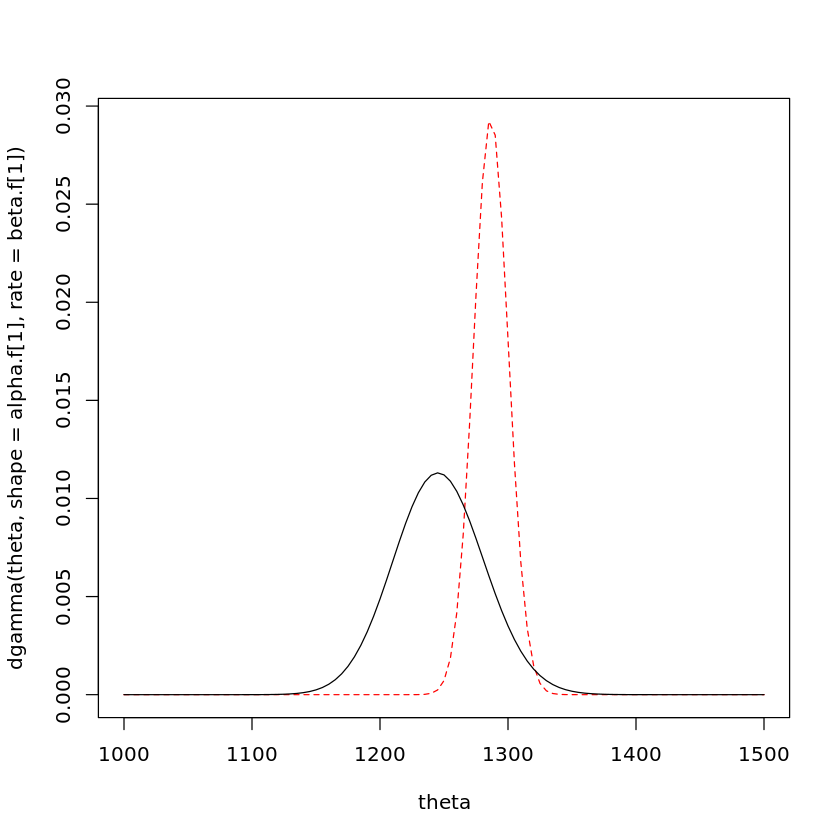

In [146]:
curve(dgamma(theta, shape = alpha.f[1], rate = beta.f[1]), from = 1000, to = 1500, col = 2, lty = 2, xname = 'theta')
curve(dgamma(theta, shape = alpha.i[1], rate = beta.i[1]), add = TRUE, xname = 'theta', ylab = 'Density')
#title(main=paste0("Distribución inicial informativa para theta  (negra: inicial; roja: final); y = ",y.71," n = ",n.71),
#      cex.main=0.75)

In [160]:
(n.1 <- alpha.f)
(p.1 <- beta.f/(beta.f + 1))

qnbinom(.025,n.1[1],p.1[1])
qnbinom(.975,n.1[1],p.1[1])
 
(p.1[1]*n.1[1])/(1-p.1[1])

[1]  9007.2083  5811.5000 10846.1250  8139.1250  1892.0000 18948.4167
 [7] 12946.4583  5664.0833 19111.1250  2057.8750  8291.2500   809.5417
[13]  2916.6667  7187.2500  7421.5833  3814.2083

[1] 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875
[13] 0.875 0.875 0.875 0.875

[1] 1212

[1] 1363

[1] 63050.46

In [165]:
n <- data_frame((p.1*n.1)/(1-p.1))
#LI <- data_frame(qnbinom(.025,alpha.f,beta.f))
#LS <- data_frame(qnbinom(.975,alpha.f,beta.f))
alpha <- alpha.f
beta <- beta.f


for(i in 2:6){
    alpha <- alpha + n[i-1]
    beta <- beta.i + 1
    r <- alpha
    p <- beta/(beta + 1)
    n[,i] <- (p*r)/(1-p)
#    LI[,i] <- qnbinom(.025,alpha,beta)
#    LS[,i] <- qnbinom(.975,alpha,beta)
}
n

(p.1 * n.1)/(1 - p.1),(p.1 * n.1)/(1 - p.1),(p.1 * n.1)/(1 - p.1),(p.1 * n.1)/(1 - p.1),(p.1 * n.1)/(1 - p.1),(p.1 * n.1)/(1 - p.1)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63050.458,144115.33,432346,1297038,3891114,11673342
40680.500,92984.00,278952,836856,2510568,7531704
75922.875,173538.00,520614,1561842,4685526,14056578
56973.875,130226.00,390678,1172034,3516102,10548306
13244.000,30272.00,90816,272448,817344,2452032
132638.917,303174.67,909524,2728572,8185716,24557148
90625.208,207143.33,621430,1864290,5592870,16778610
39648.583,90625.33,271876,815628,2446884,7340652
133777.875,305778.00,917334,2752002,8256006,24768018
